Import library

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


Membaca Dataset

In [2]:
# Membaca dataset
data = pd.read_csv('/content/youtube-top-100-songs-2025.csv')

# Menampilkan 5 data teratas
print("Data Awal:")
print(data.head())


Data Awal:
                                               title  \
0   ROSÉ & Bruno Mars - APT. (Official Music Video)   
1  Lady Gaga, Bruno Mars - Die With A Smile (Offi...   
2  Reneé Rapp - Leave Me Alone (Official Music Vi...   
3  Billie Eilish - BIRDS OF A FEATHER (Official M...   
4            Reneé Rapp - Mad (Official Music Video)   

                                           fulltitle  \
0   ROSÉ & Bruno Mars - APT. (Official Music Video)   
1  Lady Gaga, Bruno Mars - Die With A Smile (Offi...   
2  Reneé Rapp - Leave Me Alone (Official Music Vi...   
3  Billie Eilish - BIRDS OF A FEATHER (Official M...   
4            Reneé Rapp - Mad (Official Music Video)   

                                         description  view_count categories  \
0  ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...  2009014557      Music   
1  MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...  1324833300      Music   
2  Listen to “BITE ME”, the new album from Reneé ...     2536628      Music   

Pengecekan Data Awal

In [3]:
# Informasi dataset
print("\nInformasi Dataset:")
print(data.info())

# Cek data kosong
print("\nCek Missing Values:")
print(data.isnull().sum())

# Hapus data kosong (jika ada)
data = data.dropna()



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   100 non-null    object
 1   fulltitle               100 non-null    object
 2   description             100 non-null    object
 3   view_count              100 non-null    int64 
 4   categories              100 non-null    object
 5   tags                    85 non-null     object
 6   duration                100 non-null    int64 
 7   duration_string         100 non-null    object
 8   live_status             100 non-null    bool  
 9   thumbnail               100 non-null    object
 10  channel                 100 non-null    object
 11  channel_url             100 non-null    object
 12  channel_follower_count  100 non-null    int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 9.6+ KB
None

Cek Missing Values:
title      

Encoding Kolom Kategorikal

In [4]:
# Mengubah kolom bertipe object menjadi numerik
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


Pemisahan Fitur dan Target

In [6]:
# Misalkan kolom target adalah 'view_count'
X = data.drop(columns=['view_count'])
y = data['view_count']

# Split data menjadi train dan test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalisasi Data

In [7]:
# Normalisasi data agar model lebih stabil
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Membangun Model ANN

In [8]:
# Membangun model Artificial Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # regresi

# Kompilasi model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Melatih Model ANN

In [9]:
# Melatih model dengan data training
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 17075990031237120.0000 - mae: 81092216.0000 - val_loss: 132581010452774912.0000 - val_mae: 153576432.0000
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 21129991408320512.0000 - mae: 87476240.0000 - val_loss: 132581010452774912.0000 - val_mae: 153576432.0000
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 16793317832392704.0000 - mae: 76057400.0000 - val_loss: 132581010452774912.0000 - val_mae: 153576432.0000
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18788493350141952.0000 - mae: 80800848.0000 - val_loss: 132581010452774912.0000 - val_mae: 153576432.0000
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 21684860380774400.0000 - mae: 83124704.0000 - val_loss: 132581010452774912.0000 - val_mae: 153576432.0000
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 25483475486244864.0000 - mae: 93830632.0000 - val_loss: 132581010452774912.0000 - val_mae: 153576432.0000
Epoch 7/100
4/4 

Evaluasi Model

In [10]:
# Prediksi data test
y_pred = model.predict(X_test)

# Hitung nilai error dan akurasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step

Evaluasi Model:
Mean Squared Error (MSE): 246374150325665792.00
R-squared (R²): -0.14


Visualisasi Hasil

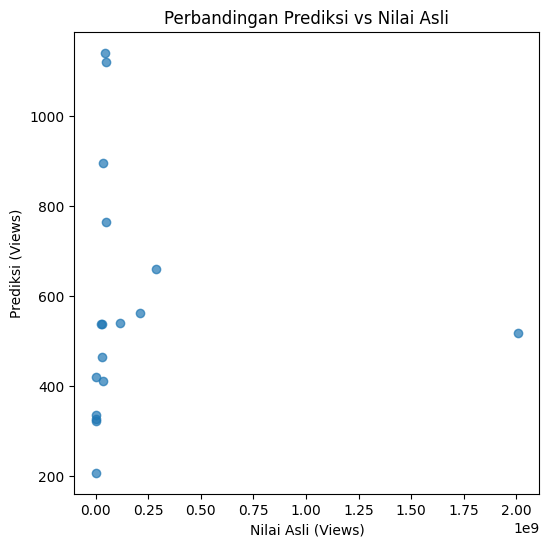

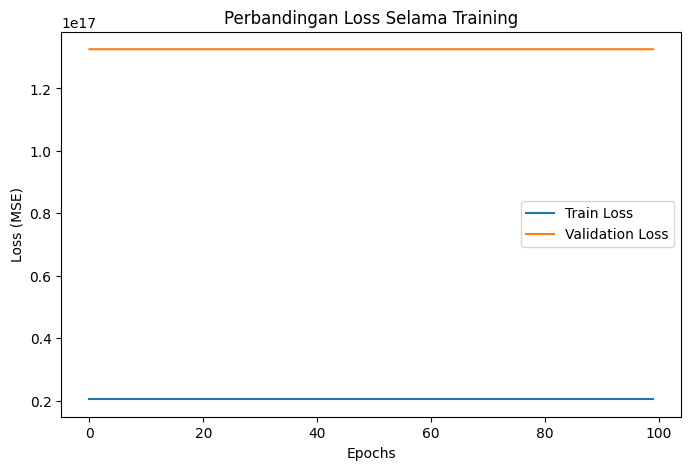

In [11]:
# Scatter plot prediksi vs nilai asli
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Nilai Asli (Views)")
plt.ylabel("Prediksi (Views)")
plt.title("Perbandingan Prediksi vs Nilai Asli")
plt.show()

# Grafik Loss selama pelatihan
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Perbandingan Loss Selama Training')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()
